## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [142]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:
#2 Check the shape of the DataFrame (rows, columns)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
df.shape

(545, 13)

In [146]:
#3 Look at the data types of the columns

In [147]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [148]:
#4 Check for missing  values if any, replace with appropriate values

In [149]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [150]:
df.fillna("siri", inplace=True)  

In [151]:
#5 Prepare  X (independent variables) and y (dependent variable)

In [152]:
x=df[['area']]
y=df['price']

In [153]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

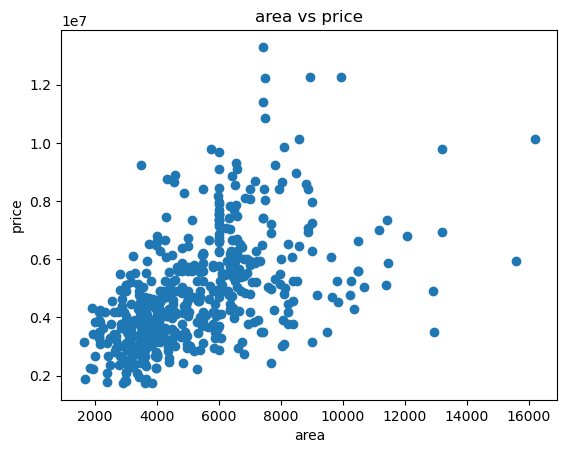

In [154]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("area")
plt.ylabel("price")
plt.title("area vs price")
plt.show()

In [155]:
#7 Encoding categorical data in X

In [156]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['mainroad']=lab.fit_transform(df['mainroad'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad guestroom  \
0    13300000  7420         4          2        3         1        no   
1    12250000  8960         4          4        4         1        no   
2    12250000  9960         3          2        2         1        no   
3    12215000  7500         4          2        2         1        no   
4    11410000  7420         4          1        2         1       yes   
..        ...   ...       ...        ...      ...       ...       ...   
540   1820000  3000         2          1        1         1        no   
541   1767150  2400         3          1        1         0        no   
542   1750000  3620         2          1        1         1        no   
543   1750000  2910         3          1        1         0        no   
544   1750000  3850         3          1        2         1        no   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes        2    

In [157]:
#8  Avoiding the Dummy Variable Trap

In [158]:
#9 Apply feature scaling on numerical variables

In [159]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['guestroom']=lab.fit_transform(df['guestroom'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes 

In [160]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['basement']=lab.fit_transform(df['basement'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement hotwaterheating airconditioning  parking prefarea  \
0           0              no             ye

In [161]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['hotwaterheating']=lab.fit_transform(df['hotwaterheating'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating airconditioning  parking prefarea  \
0           0                0             

In [162]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['airconditioning']=lab.fit_transform(df['airconditioning'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking prefarea  \
0           0                0            

In [163]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['prefarea']=lab.fit_transform(df['prefarea'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [164]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['furnishingstatus']=lab.fit_transform(df['furnishingstatus'])
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [165]:
from sklearn.preprocessing import MaxAbsScaler

In [166]:
scaler=MaxAbsScaler()
scaled_data=scaler.fit_transform(df)
print(df)
print(scaled_data)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [167]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)
print(df.shape)

(545, 13)


In [169]:
#11 Fitting Multiple Linear Regression to the Training

In [170]:
model=LinearRegression()
x_train_fit=model.fit(x_train,y_train)

In [171]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [172]:
y_pred = model.predict(x_train)

In [173]:
error=y_pred-y_train

In [174]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

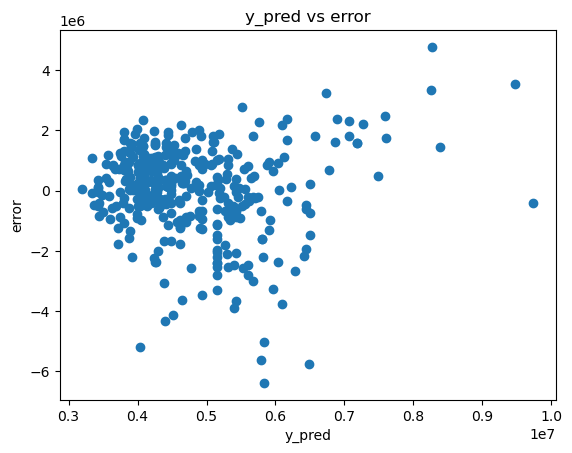

In [175]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,error)
plt.xlabel("y_pred")
plt.ylabel("error")
plt.title("y_pred vs error")
plt.show()

In [176]:
#14  Predic on the test set

In [177]:
y_pred_testset = model.predict(x_train)
#print(y_pred_testset)

In [178]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

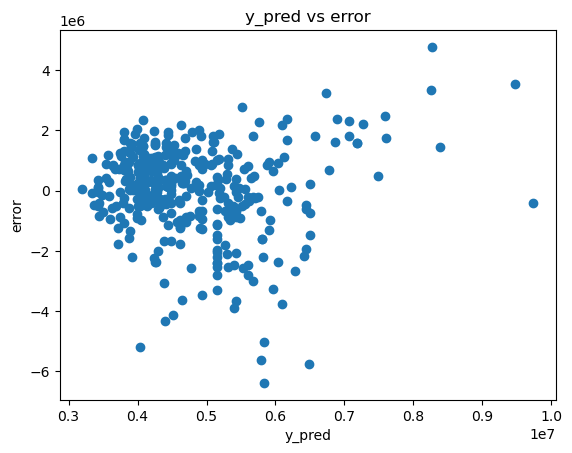

In [179]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,error)
plt.xlabel("y_pred")
plt.ylabel("error")
plt.title("y_pred vs error")
plt.show()

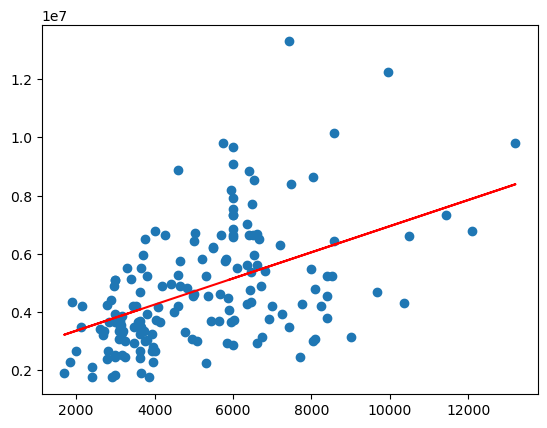

In [180]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red')

In [181]:
#16 Print Mean Squared Error and R Squared Value

In [182]:
from sklearn.metrics import r2_score


In [183]:

y_predict = model.predict(x_test)
print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test,y_predict))

3193989923757.6206
0.2583140345296001


In [184]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)